In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [208]:
import warnings
warnings.filterwarnings("ignore")

### !! READ DATASET

In [209]:
df = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\loan.csv', low_memory=False)

In [210]:
df = df.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
              'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
              'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis =1)

1. Terdiri dari 75 kolom dan 466285 baris
2. Terdapat 17 kolom yang kosong sehingga langsung di drop sejak awal sehingga tersisa 58 kolom

### !! LABELLING DATASET

In [211]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [212]:
df = df.drop(df[df['loan_status'] == 'Current'].index)

In [213]:
df = df.rename(columns={"loan_status": "risk_flag"})

In [214]:
df["risk_flag"] = df["risk_flag"].replace(to_replace=[
    "Charged Off", "Default", 'Does not meet the credit policy. Status:Charged Off',
    'Does not meet the credit policy. Status:Fully Paid', "Late (31-120 days)", "Late (16-30 days)"
], value=1)
df["risk_flag"] = df["risk_flag"].replace(to_replace=['Fully Paid', 'In Grace Period'], value=0)

1. Good flag : Fully paid, In grace period
2. Bad flag : Charged Off, Default, Does not meet the credit policy. Status: charged off, Does not meet the credit policy. Status: fully paid, late (10-30 days), late (31-120 days)
3. Loan yang berstatus current di drop karena tidak dapat ditentukan akan mewakili flag apa

In [215]:
df["risk_flag"].unique()

array([0, 1], dtype=int64)

In [216]:
df.to_csv("loan_labelled.csv")

# EDA

In [217]:
df = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\loan_labelled.csv')

In [218]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [219]:
nums = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
        'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 
        'mths_since_last_major_derog', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal', 
        'total_rev_hi_lim']
cats = ['term', 'grade', 'emp_length', 'home_ownership','verification_status', 'initial_list_status', 'application_type', 'purpose']

### !! Cek Data duplikat

In [220]:
df.duplicated().sum()

0

In [221]:
df.duplicated('id').sum()

0

In [ ]:
df.duplicated('member_id').sum()

### !! Cek statistik data

In [223]:
df[nums].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,242059.000000,242059.000000,242059.000000,242059.000000,242059.000000,2.420550e+05,242059.000000,242030.000000,242030.000000,107096.000000,...,242059.000000,242059.000000,242059.000000,242059.000000,241914.000000,43419.000000,242030.000000,1.753700e+05,1.753700e+05,1.753700e+05
mean,13520.553254,13475.726063,13349.150388,13.881078,417.842774,7.195602e+04,16.470368,0.250469,0.905875,34.872003,...,0.976576,164.400933,17.262853,5593.482265,0.006035,42.942514,0.002900,2.012850e+02,1.364532e+05,2.904614e+04
std,8078.730959,8054.743872,8092.609035,4.386245,243.984753,5.507293e+04,7.707138,0.739738,1.172257,21.846099,...,6.483973,757.907350,118.050162,6827.611364,0.084301,21.494639,0.058489,2.191743e+04,1.502794e+05,2.847415e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7300.000000,7200.000000,7200.000000,10.990000,240.170000,4.500000e+04,10.740000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,412.790000,0.000000,26.000000,0.000000,0.000000e+00,2.796200e+04,1.320000e+04
50%,12000.000000,12000.000000,11950.000000,13.670000,365.300000,6.150000e+04,16.180000,0.000000,1.000000,32.000000,...,0.000000,0.000000,0.000000,2787.440000,0.000000,42.000000,0.000000,0.000000e+00,7.898250e+04,2.200000e+04
75%,18125.000000,18000.000000,18000.000000,16.770000,546.690000,8.600000e+04,21.920000,0.000000,1.000000,51.000000,...,0.000000,0.000000,0.000000,8698.535000,0.000000,60.000000,0.000000,0.000000e+00,2.061448e+05,3.610000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.990000,29.000000,33.000000,152.000000,...,358.680000,33520.270000,7002.190000,36234.440000,6.000000,154.000000,5.000000,9.152545e+06,8.000078e+06,2.013133e+06


In [224]:
df[cats].describe()

,term,grade,emp_length,home_ownership,verification_status,initial_list_status,application_type,purpose
count,242059,242059,232732,242059,242059,242059,242059,242059
unique,2,7,11,6,3,2,1,14
top,36 months,B,10+ years,MORTGAGE,Verified,f,INDIVIDUAL,debt_consolidation
freq,188448,72920,72295,118837,90030,179561,242059,141061


### !! Cek outliers 

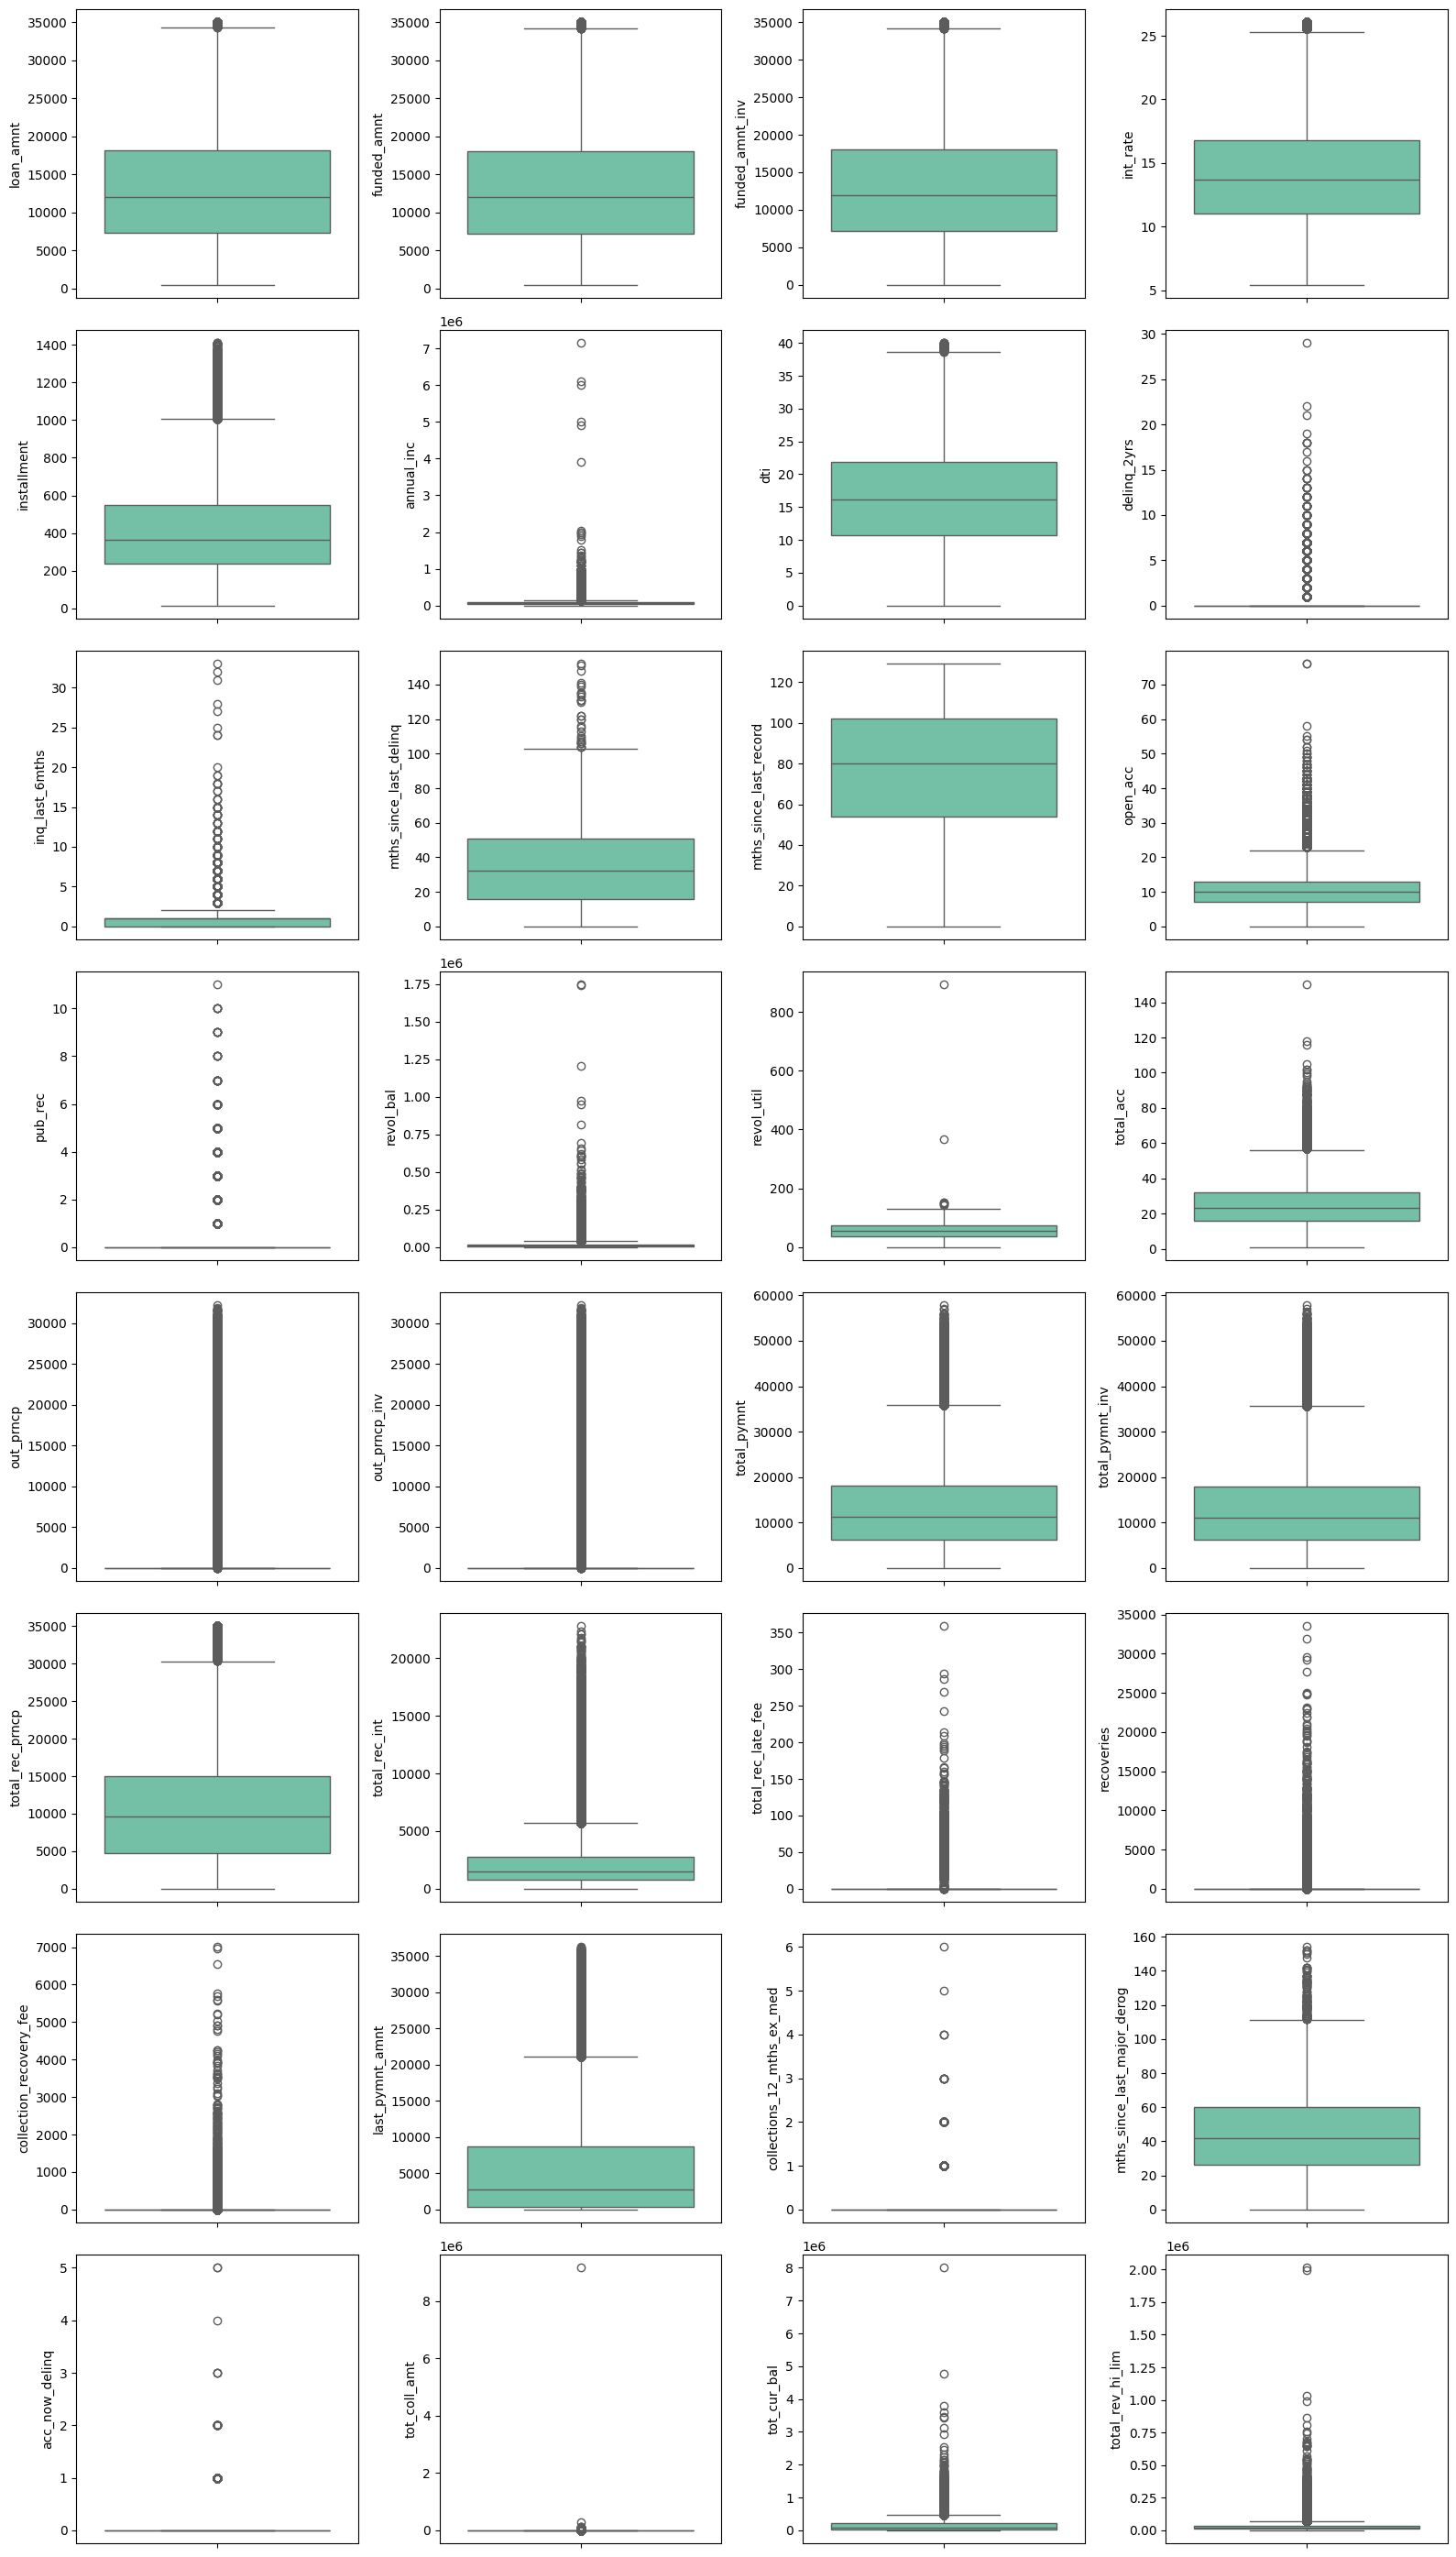

In [136]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(16, 28))
axes = axes.flatten()

for i, num in enumerate(nums):
    sns.boxplot(y=df[num], color='mediumaquamarine', orient='v', ax=axes[i])  

plt.tight_layout()
plt.show()

Semua kolom terdeteksi memiliki outlier akan tetapi masih dalam kategori normal (mewakili real life case) oleh karena itu diputuskan untuk tidak perlu melakukan handling outlier pada pre-processing

### !! Cek distribusi data numerik

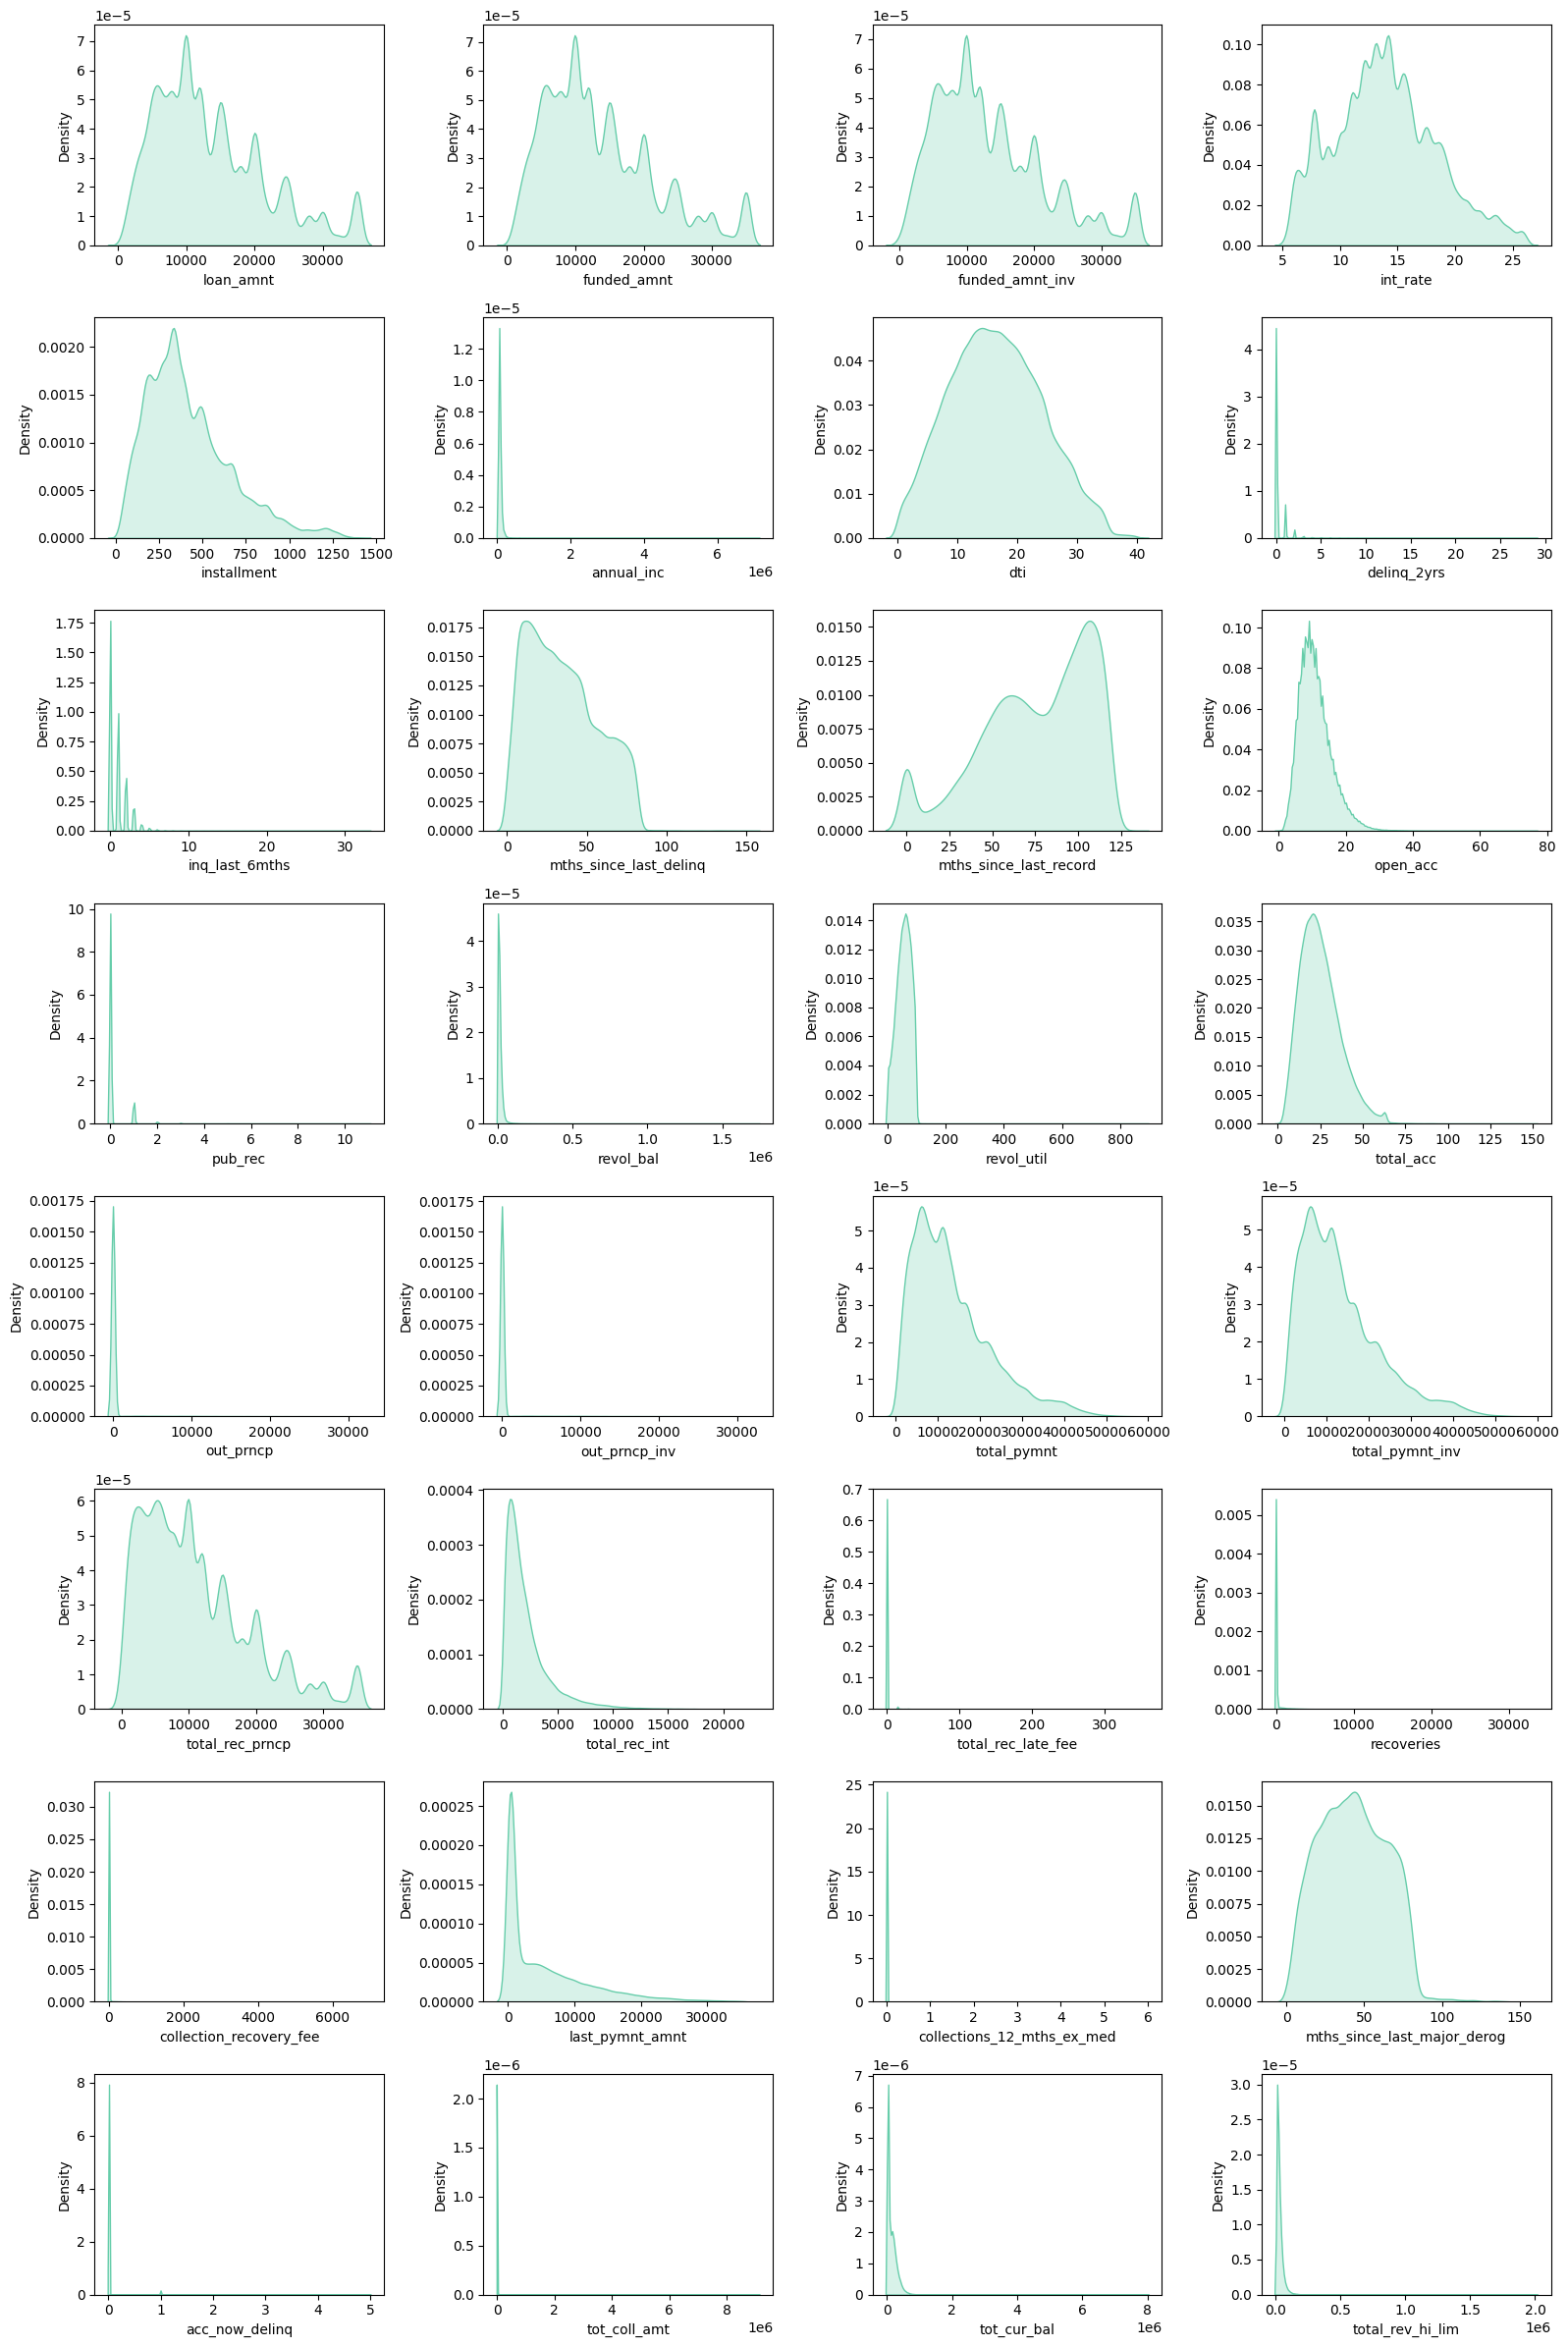

In [137]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(16, 24)) 
axes = axes.flatten()
for i, num in enumerate(nums):
    sns.kdeplot(df[num], color='mediumaquamarine', fill=True, ax=axes[i])

plt.tight_layout()
plt.show()

1. Kebanyakan kolom positively skewed
2. Kolom mths_since_last_record negatively skewed
3. Kolom dti cenderung memiliki normal skewed

### !! Cek distribusi data kategorik

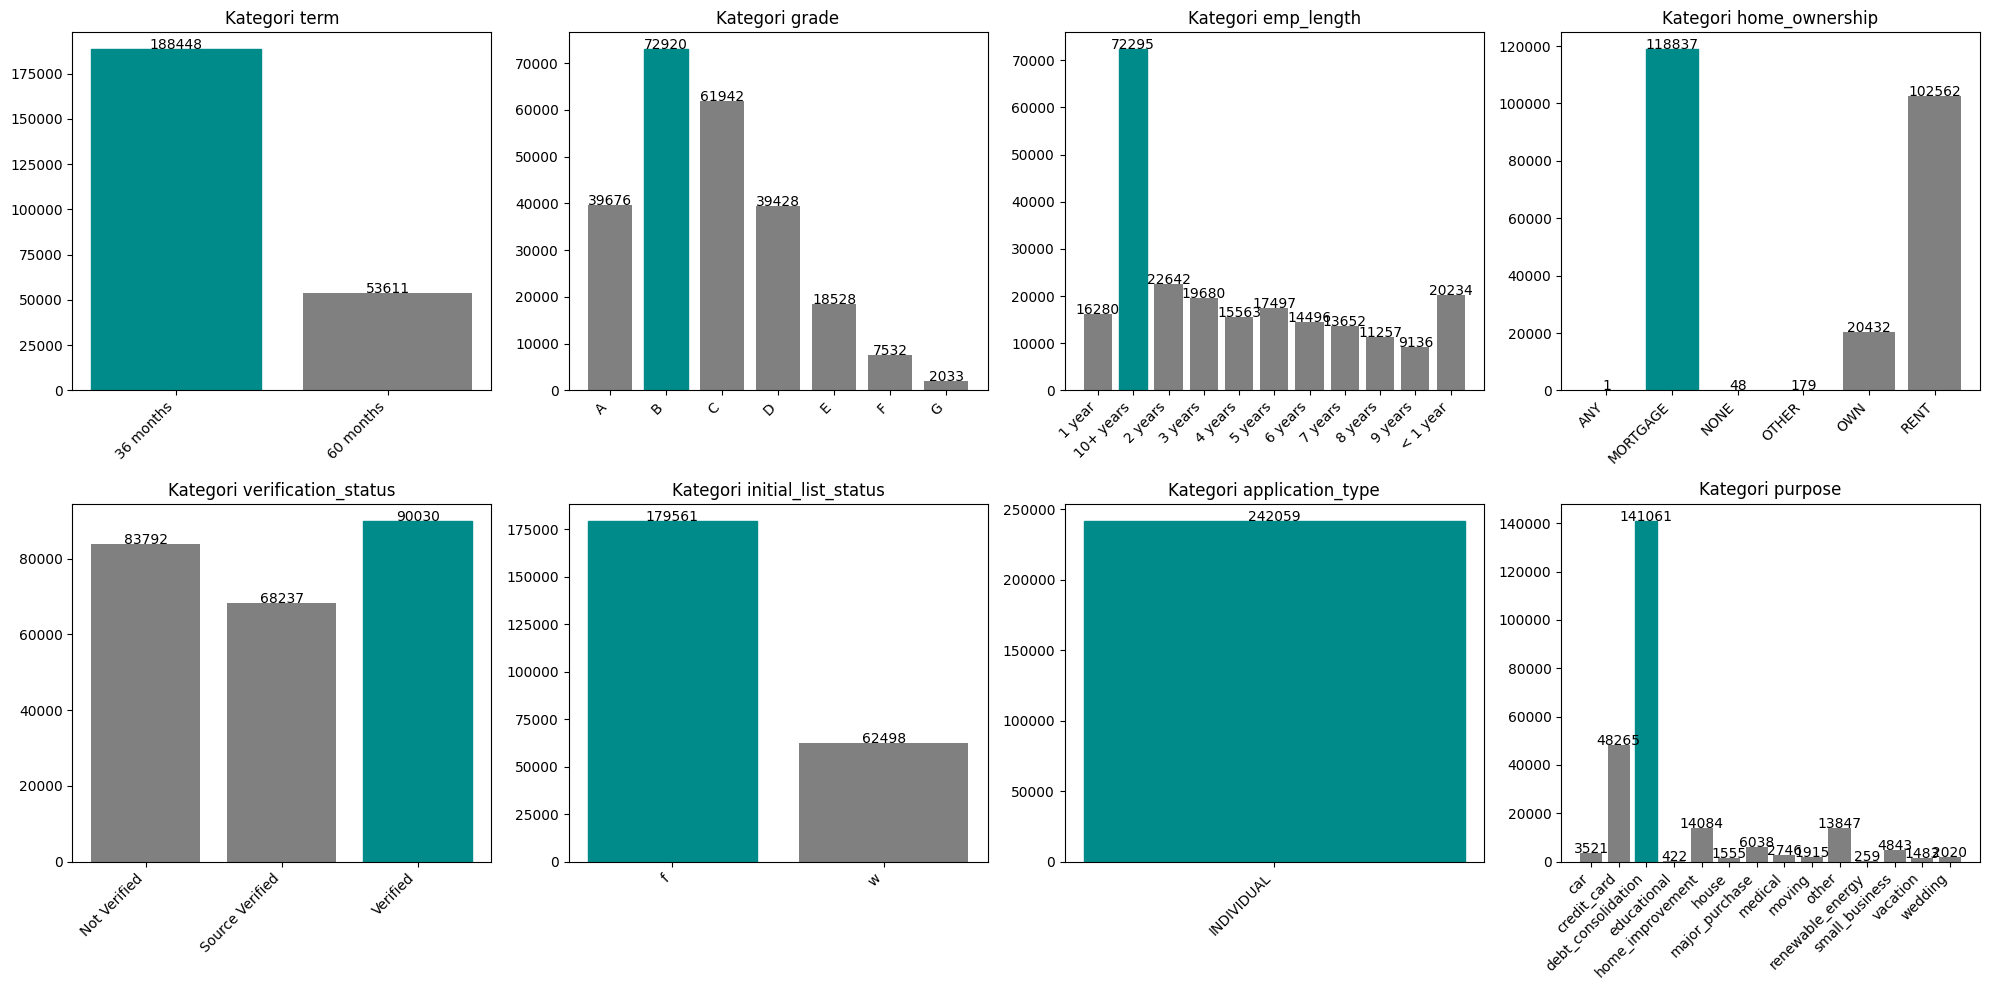

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, cat in enumerate(cats[:8]):
    data = df[cat]
    value_counts = data.value_counts().sort_index()
    max_value_index = np.argmax(value_counts)

    bars = axes[i].bar(value_counts.index, value_counts.values, color='grey')
    bars[max_value_index].set_color('darkcyan')

    for j, v in enumerate(value_counts.values):
        x = axes[i].get_xticks()[j]  
        axes[i].text(x, v + 5, str(v), ha='center')  

    axes[i].set_title(f"Kategori {cat}")
    axes[i].set_xticks(value_counts.index)
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

1. Semua peminjam melakukan peminjaman dengan aplication type individual
2. Kebanyakan kategori memiliki 1 kelas yang jauh lebih unggul dari pada kelas-kelas lainnya 

### !! Cek korelasi data numerik dengan label

In [139]:
nums2 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
        'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 
        'mths_since_last_major_derog', 'acc_now_delinq','tot_coll_amt', 'tot_cur_bal', 
        'total_rev_hi_lim', 'risk_flag']

<Axes: >

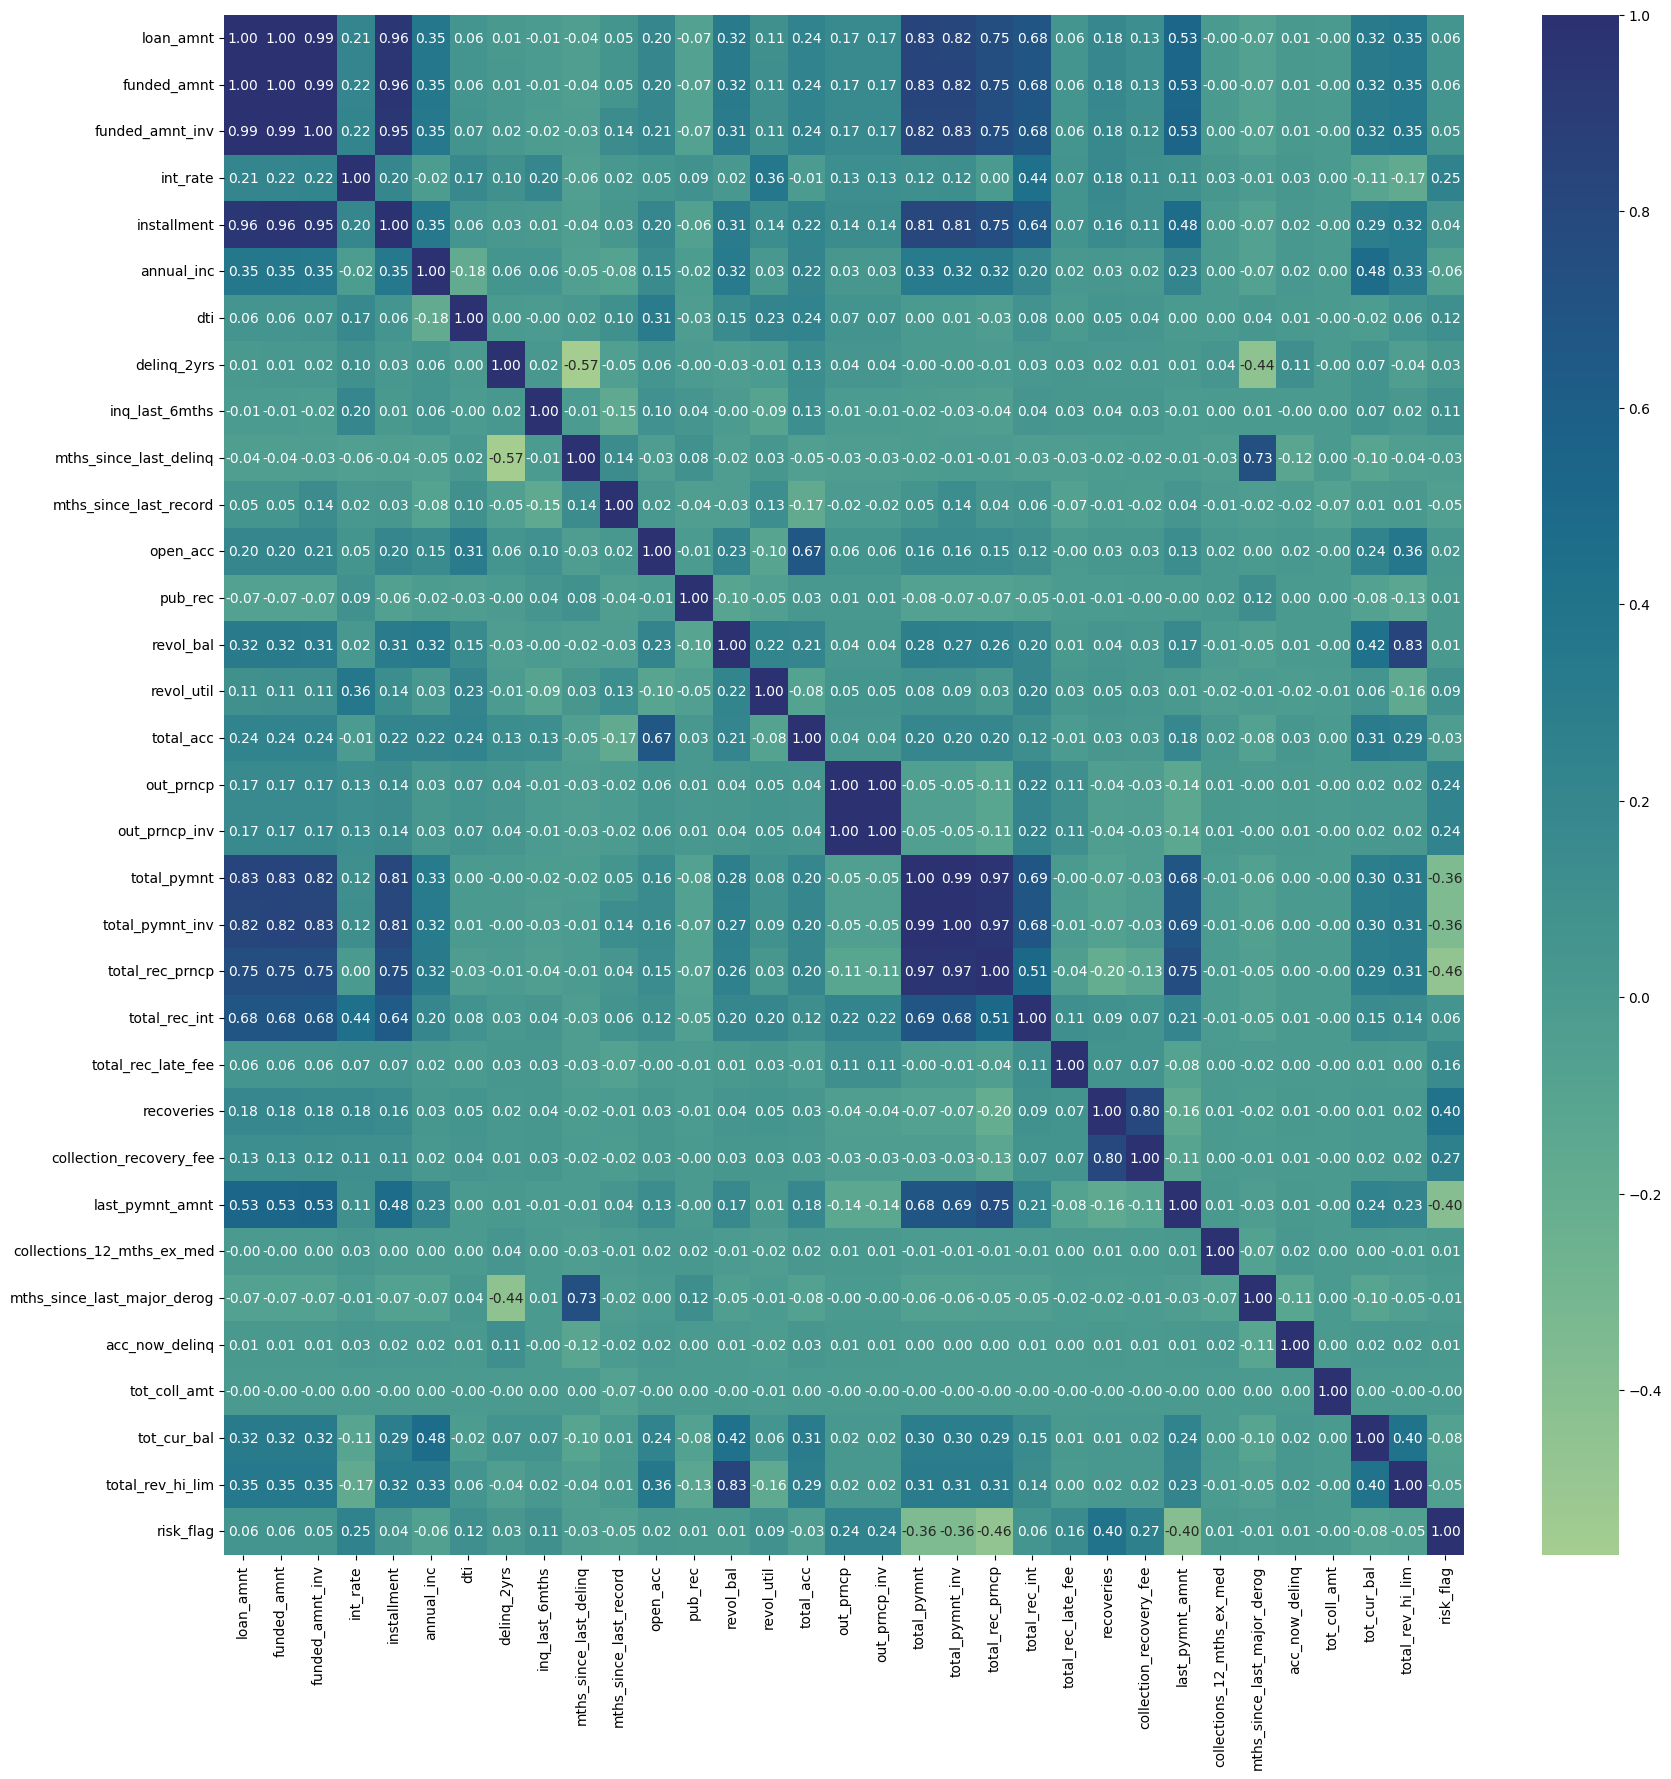

In [140]:
plt.figure(figsize=(20, 20))
sns.heatmap(df[nums2].corr(), cmap='crest', annot=True, fmt='.2f')

1. kolom yang punya korelasi negatif dengan label : total_rec_prncp, last_pymnt_amnt, total_pymnt, total_pymnt_inv 
2. kolom yang punya korelasi positif dengan label : recoveries

### !! Cek korelasi antar fitur untuk fitur yang berkorelasi dengan label

In [225]:
nums3 = ['last_pymnt_amnt', 'total_rec_prncp', 'total_pymnt',
         'total_pymnt_inv', 'recoveries', 'out_prncp',
         'collection_recovery_fee', 'int_rate', 'risk_flag']

<Axes: >

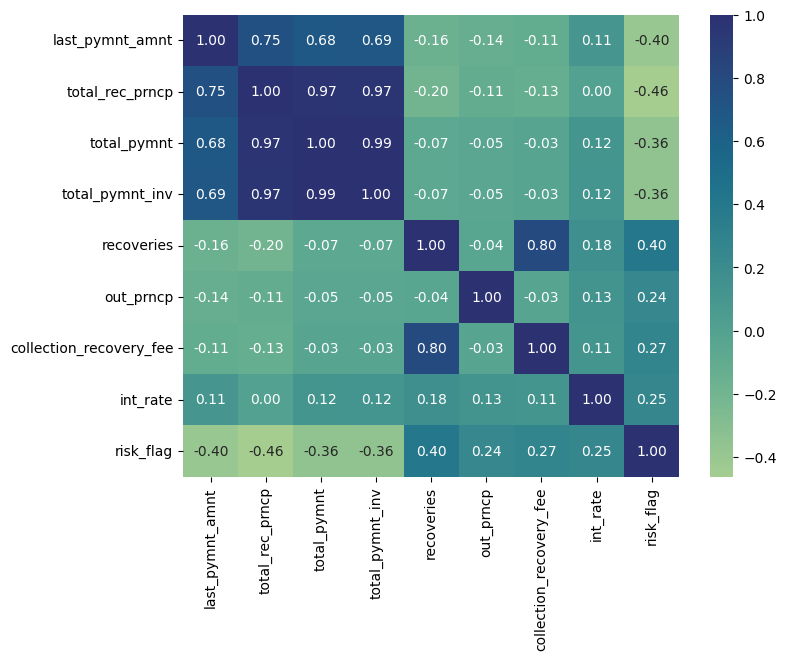

In [226]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[nums3].corr(), cmap='crest', annot=True, fmt='.2f')

1. kolom total_rec dan recoveries adalah kolom dengan korelasi paling kuat dan paling baik
2. kolom total_rec memiliki korelasi yang tinggi dengan kolom lainnya yang berkorelasi baik dengan label
3. kolom recoveries memiliki korelasi yang tinggi dengan collection_recoveries_fee

# PRE-PROCESSING

### !! Handling missing values

In [227]:
df.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       13611
emp_length                       9327
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
risk_flag                           0
pymnt_plan                          0
url                                 0
desc                           149405
purpose                             0
title                              16
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [228]:
df = df.drop(['sub_grade', 'pymnt_plan', 'url', 'zip_code', 'addr_state', 'id', 'member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'tot_coll_amt', 
              'tot_cur_bal', 'total_rev_hi_lim', 'emp_title', 'last_pymnt_d', 'last_credit_pull_d', 'issue_d', 'title', 'earliest_cr_line', 'purpose', 'total_pymnt_inv' ], axis =1)

1. Proses drop mulai dilakukan untuk kolom yang memiliki nilai null terlalu banyak dengan dan tidak memiliki korelasi baik dengan label
2. Beberapa kolom informasi pribadi seperti id dan member_id juga di drop
3. Kolom dengan unique terlalu banyak (purpose, title, emp_title dll) juga di drop
3. Kolom berisi teks dan time juga di drop

In [229]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [230]:
df['delinq_2yrs'].fillna(df['delinq_2yrs'].mean(), inplace=True)
df['open_acc'].fillna(df['open_acc'].mean(), inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].mean(), inplace=True)
df['pub_rec'].fillna(df['pub_rec'].mean(), inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['total_acc'].fillna(df['total_acc'].mean(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(), inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].mean(), inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

Kolom lainnya yang dipertahankan di isi nilai nullnya dengan mean dari masing-masing kolom

In [231]:
df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
risk_flag                     0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_c

### !! Encoding

In [232]:
df['emp_length'] = df["emp_length"].replace(to_replace=['< 1 year', '1 year', '2 years'], value='new')
df['emp_length'] = df['emp_length'].replace(to_replace=['3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years'], value='middle')
df['emp_length'] = df["emp_length"].replace(to_replace=['10+ years'], value='senior')

Values pada kolom emp_lenght dikelompokkan menjadi 3 kelas yaitu new, middle dan senior 

In [233]:
# encoding term
mapping_term = {
    ' 36 months' : 1,
    ' 60 months' : 2
}
df['term'] = df['term'].map(mapping_term)

# encoding grade
mapping_grade = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7
}
df['grade'] = df['grade'].map(mapping_grade)

# encoding emp_length
mapping_emp = {
    'new' : 1,
    'middle' : 2,
    'senior' : 3
}
df['emp_length'] = df['emp_length'].map(mapping_emp)

In [234]:
mapping_home = pd.get_dummies(df['home_ownership'], prefix = 'Is')
df = pd.concat([df, mapping_home], axis=1)

mapping_verification = pd.get_dummies(df['verification_status'], prefix = 'Is')
df = pd.concat([df, mapping_verification], axis=1)

mapping_list_status = pd.get_dummies(df['initial_list_status'], prefix = 'Is')
df = pd.concat([df, mapping_list_status], axis=1)

mapping_application_type = pd.get_dummies(df['application_type'], prefix = 'Is')
df = pd.concat([df, mapping_application_type], axis=1)

In [235]:
df[['Is_RENT', 'Is_OWN', 'Is_MORTGAGE', 'Is_OTHER', 'Is_NONE', 'Is_ANY']] = df[['Is_RENT', 'Is_OWN', 'Is_MORTGAGE', 'Is_OTHER', 'Is_NONE', 'Is_ANY']].astype(int)

df[['Is_Verified', 'Is_Source Verified', 'Is_Not Verified']] = df[['Is_Verified', 'Is_Source Verified', 'Is_Not Verified']].astype(int)

df[['Is_f', 'Is_w']] = df[['Is_f', 'Is_w']].astype(int)

df['Is_INDIVIDUAL'] = df['Is_INDIVIDUAL'].astype(int)

1. Label encoding dilakukan pada kolom term, grade dan emp_length
2. One hot encoding dilakukan pada kolom home_ownership, verification_status, initial_list_status dan application_type

In [236]:
df = df.drop(['home_ownership', 'verification_status', 'initial_list_status', 'application_type' ], axis = 1)

In [237]:
df.to_csv('loan_modelling.csv', index=False)

### !! Train-test split

In [238]:
df = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\loan_modelling.csv')

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=77)

In [241]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

### !! Handling imbalance data

In [242]:
df_train = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\train.csv')

In [243]:
df_train.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
annual_inc                    0
risk_flag                     0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
Is_ANY                        0
Is_MORTG

In [244]:
df_train['risk_flag'].value_counts()

risk_flag
0    131431
1     38010
Name: count, dtype: int64

In [245]:
X_train = df_train.drop(['risk_flag'],axis = 1)
y_train = df_train['risk_flag']

In [246]:
smote = SMOTE(sampling_strategy=0.7) 

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
oversampled_data = pd.concat([pd.DataFrame(X_train_oversampled), pd.DataFrame({'risk_flag': y_train_oversampled})], axis=1)

oversampling dilakukan dengan SMOTE agar kelas minoritas (1) menjadi 70% dari kelas prioritas

In [247]:
oversampled_data.to_csv('data_train_oversampled.csv', index=False)

In [248]:
df_train = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\data_train_oversampled.csv')

### !! Cek korelasi kolom kategorikal dengan label

In [191]:
cats1 = ['term', 'grade', 'emp_length']

In [192]:
for cats1 in cats1:
    contingency_table, test_results = rp.crosstab(df_train[cats1], df_train['risk_flag'], test='chi-square')
    print(f"Chi-square Test Results for '{cats1}':\n{test_results}\n")

Chi-square Test Results for 'term':
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   2705.8574
1                    p-value =      0.0000
2               Cramer's phi =      0.1069

Chi-square Test Results for 'grade':
                Chi-square test     results
0  Pearson Chi-square ( 6.0) =   14469.3730
1                    p-value =       0.0000
2                 Cramer's V =       0.2473

Chi-square Test Results for 'emp_length':
                Chi-square test    results
0  Pearson Chi-square ( 2.0) =   5443.0883
1                    p-value =      0.0000
2                 Cramer's V =      0.1517



In [193]:
for col in df_train.columns:  # Looping melalui semua kolom dalam DataFrame
    if col.startswith('Is_'):  # Contoh: Jika nama kolom one-hot encoded dimulai dengan 'one_hot_'
        contingency_table, test_results = rp.crosstab(df_train[col], df_train['risk_flag'], test='chi-square')
        print(f"Chi-square Test Results for '{col}':\n{test_results}\n")

Chi-square Test Results for 'Is_ANY':
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.8000
1                    p-value =    0.3711
2               Cramer's phi =    0.0018

Chi-square Test Results for 'Is_MORTGAGE':
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   9561.8197
1                    p-value =      0.0000
2               Cramer's phi =      0.2010

Chi-square Test Results for 'Is_NONE':
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.6120
1                    p-value =    0.2042
2               Cramer's phi =    0.0026

Chi-square Test Results for 'Is_OTHER':
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   10.4494
1                    p-value =    0.0012
2               Cramer's phi =    0.0066

Chi-square Test Results for 'Is_OWN':
                Chi-square test    results
0  Pearson Chi-square ( 1.0) =   2075.8943
1                    p-value =      0.0000
2    

1. kolom 'grade' memiliki hubungan paling baik dengan score cramer's V paling tinggi yaitu 0,2 dan pearson 13390.0331
2. kolom 'Is_NONE' dan 'Is_ANY memiliki score pvalue lebih besar dari 0.05 sehingga bisa dikatakan kedua kolom tersebut tidak memiliki hubungan yang signifikan dengan label
3. Is_INDIVIDUAL memiliki score c's v 0.0 sehingga tidak memiliki korelasi sama sekali dengan label

### !! Feature selection

In [250]:
fitur = ['recoveries', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_pymnt', 'collection_recovery_fee', 'int_rate', 'grade', 'term', 'emp_length', 'Is_MORTGAGE', 'Is_Not Verified', 'Is_Source Verified', 'Is_f', 'risk_flag']
new_df = df_train[fitur].copy()  

new_df.to_csv('train_selected_fitur.csv', index=False) 

Feature selection di pilih berdasarkan kolom-kolom yang memiliki korelasi dengan label. Semua kolom diambil termasuk kolom yang saling berkorelasi 1 sama lain (agar ruang eksplor saat modelling lebih luas terkait kombinasi kolom yang akan digunakan).
1. recoveries : 0.40
2. total_rec_prncp : -0.46
3. last_pymnt_amnt : -0.40
4. out_prncp : 0.24 
5. total_pymnt :0.36
6. collection_recovery_fee : 0.27
7. int_rate : 0.25
8. grade : skor c's v 0.2 
9. term : c's v 0.11
10. emp_length : c's v 0.13
11. 'Is_MORTAGE' : c'sv 0.18
12. 'Is_Not Verified : 0.18
13. 'Is_Source Verified : 0.10
14. 'Is_f' : 0.14

In [251]:
train = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\train_selected_fitur.csv')

In [252]:
nums = ['recoveries', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_pymnt', 'collection_recovery_fee', 'int_rate']

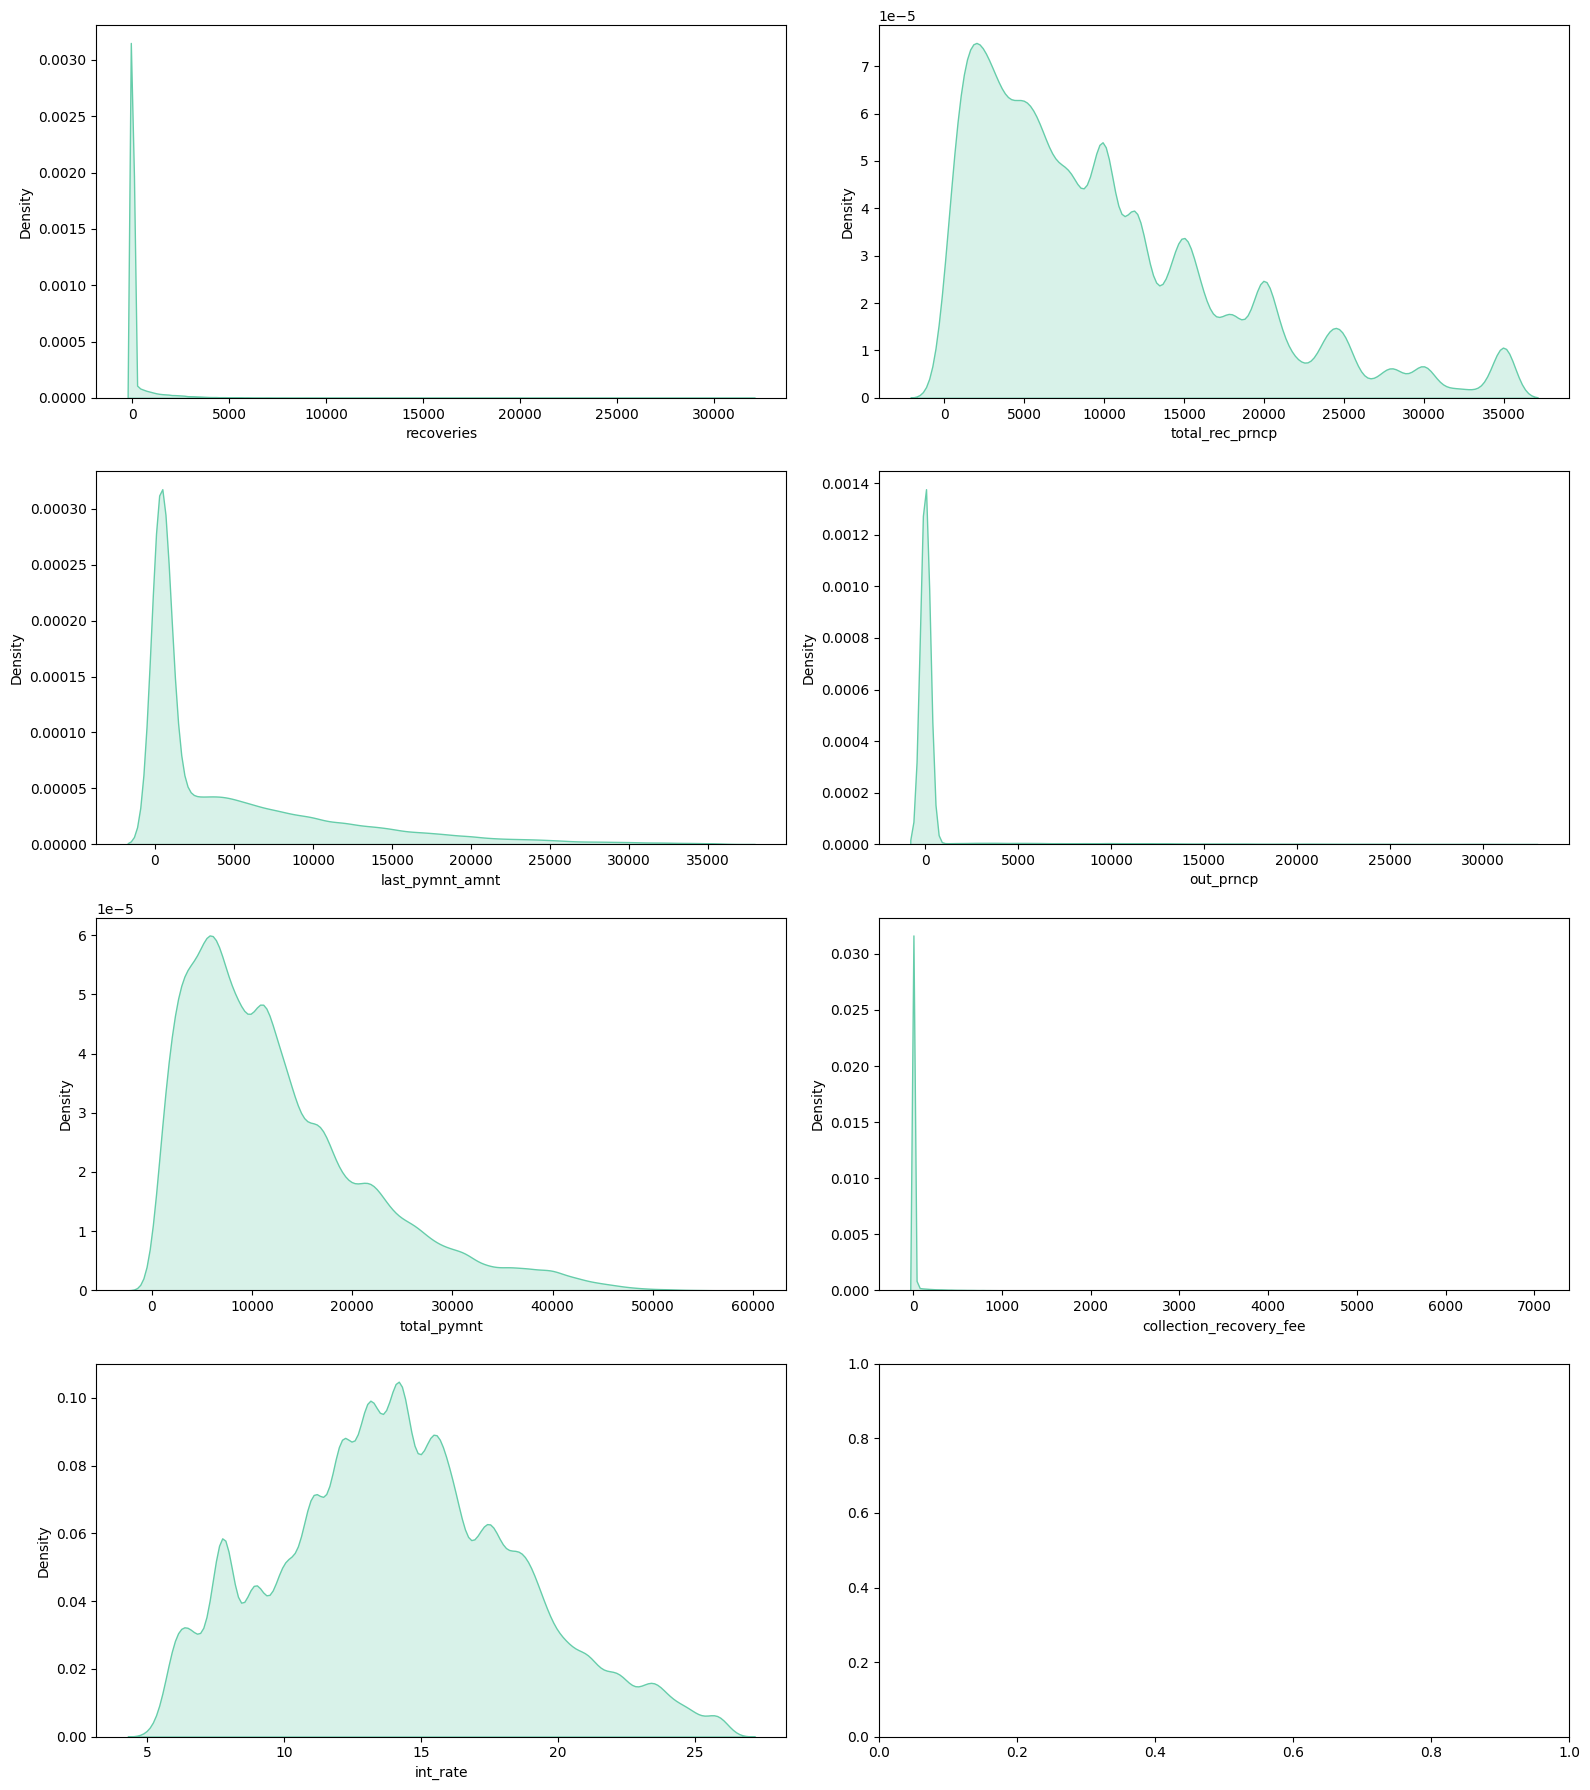

In [175]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18)) 
axes = axes.flatten()
for i, num in enumerate(nums):
    sns.kdeplot(train[num], color='mediumaquamarine', fill=True, ax=axes[i])

plt.tight_layout()
plt.show()

### !! Normalisasi fitur

In [253]:
normalisasi = ['recoveries', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_pymnt', 'collection_recovery_fee']  # Ganti dengan nama kolom yang ingin dinormalisasi

scaler = MinMaxScaler()

train[normalisasi] = scaler.fit_transform(train[normalisasi])
train.to_csv('DATA_TRAIN.csv', index=False)

Fitur yang positively skewed dinormalisasi

In [254]:
df_test = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\test.csv')

In [255]:
fitur = ['recoveries', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp', 'total_pymnt', 'collection_recovery_fee', 'int_rate', 'grade', 'term', 'emp_length', 'Is_MORTGAGE', 'Is_Not Verified', 'Is_Source Verified', 'Is_f', 'risk_flag']
new_df = df_test[fitur].copy()  

new_df.to_csv('DATA_TEST.csv', index=False)

# MODELLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [2]:
data_train = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\DATA_TRAIN.csv')
data_test = pd.read_csv(r'C:\Users\jyput\Documents\IDX PROJECT\DATA_TEST.csv')

In [3]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    # cross val
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='f1', return_train_score=True)

    # score mean recall 
    train_f1_mean = scores['train_score'].mean()
    test_f1_mean = scores['test_score'].mean()

    print('Mean f1 (crossval train):', train_f1_mean)
    print('Mean f1 (crossval test):', test_f1_mean)

In [4]:
X_train = data_train[['recoveries', 'last_pymnt_amnt', 'out_prncp', 'int_rate', 'Is_MORTGAGE']]
y_train = data_train['risk_flag']
X_test = data_test[['recoveries', 'last_pymnt_amnt', 'out_prncp', 'int_rate', 'Is_MORTGAGE']]
y_test = data_test['risk_flag']

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Precision (Train Set): 1.00
Precision (Test Set): 0.92
Recall (Train Set): 1.00
Recall (Test Set): 0.62
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.74
Mean f1 (crossval train): 0.999714707469586
Mean f1 (crossval test): 0.9073933956613635


### !! Tuning hyperparameter

In [6]:
n_estimators = [300]
max_depth = [8]
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth)

gs = GridSearchCV(rf, hyperparameters, scoring='f1', cv=5)
gs.fit(X_train, y_train)
eval_classification(gs)

Precision (Train Set): 0.88
Precision (Test Set): 0.91
Recall (Train Set): 0.90
Recall (Test Set): 0.62
F1-Score (Train Set): 0.89
F1-Score (Test Set): 0.74
Mean f1 (crossval train): 0.8914460278222689
Mean f1 (crossval test): 0.8860647235707597


### !! Feature importances

In [ ]:
X_train = data_train.drop(['risk_flag'], axis = 1)
y_train = data_train['risk_flag']
X_test = data_test.drop(['risk_flag'], axis = 1)
y_test = data_test['risk_flag']

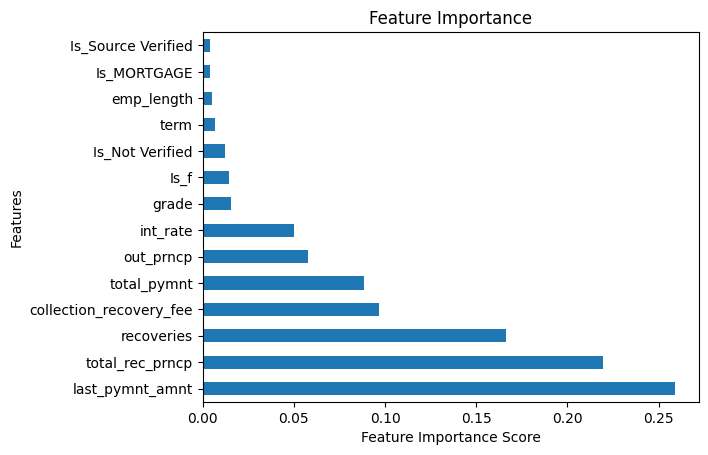

In [11]:
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

### !! Confussion matrix

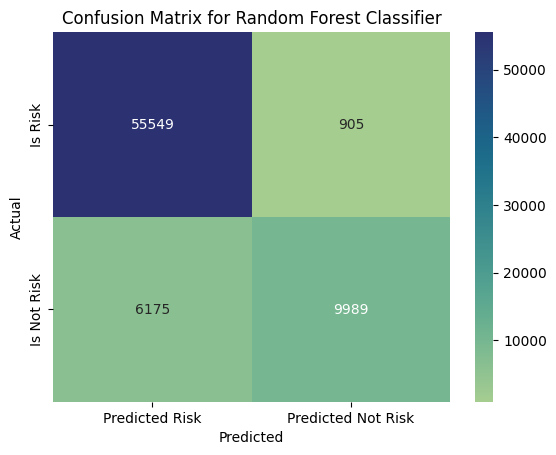

In [8]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=['Predicted Risk', 'Predicted Not Risk'], yticklabels=['Is Risk', 'Is Not Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()